In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import klib
import seaborn as sns

In [4]:
df = pd.read_csv('C:/Users/Yash/Downloads/unicorn.csv')
df.head()

,Company,Valuation($B),Date Joined,Country,City,Industry,Investors,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,﻿ByteDance,$140,04-07-2017,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group,NaN,NaN
1,SpaceX,$127,12-01-2012,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,NaN,NaN,NaN
2,SHEIN,$100,07-03-2018,China,Shenzhen,E-commerce &amp; direct-to-consumer,Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,NaN,NaN,NaN
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,Khosla Ventures,LowercaseCapital,capitalG,NaN,NaN,NaN
4,Canva,$40,01-08-2018,Australia,Surry Hills,Internet software &amp; services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,NaN,NaN,NaN


In [5]:
df = klib.data_cleaning(df)

Shape of cleaned data: (1204, 9) - Remaining NAs: 223


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 3
     of which 0 single valued.     Columns: []
Dropped missing values: 3475
Reduced memory by at least: 0.03 MB (-27.27%)



In [6]:
df.head()

,company,valuation_dollar_b,date_joined,country,city,industry,investors,unnamed_7,unnamed_8
0,﻿ByteDance,$140,04-07-2017,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments,Sina Weibo
1,SpaceX,$127,12-01-2012,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures
2,SHEIN,$100,07-03-2018,China,Shenzhen,E-commerce &amp; direct-to-consumer,Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,Khosla Ventures,LowercaseCapital,capitalG
4,Canva,$40,01-08-2018,Australia,Surry Hills,Internet software &amp; services,Sequoia Capital China,Blackbird Ventures,Matrix Partners


In [7]:
df = df.rename(columns={"unnamed_7": "investor_2"})

In [8]:
df = df.iloc[:, 0:8]

In [9]:
df.head()

,company,valuation_dollar_b,date_joined,country,city,industry,investors,investor_2
0,﻿ByteDance,$140,04-07-2017,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments
1,SpaceX,$127,12-01-2012,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson
2,SHEIN,$100,07-03-2018,China,Shenzhen,E-commerce &amp; direct-to-consumer,Tiger Global Management,Sequoia Capital China
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,Khosla Ventures,LowercaseCapital
4,Canva,$40,01-08-2018,Australia,Surry Hills,Internet software &amp; services,Sequoia Capital China,Blackbird Ventures


In [10]:
df.isna().sum()

company                0
valuation_dollar_b     0
date_joined            0
country                0
city                  17
industry               0
investors              1
investor_2            57
dtype: int64

In [11]:
df['investor_2'].fillna('No_investor', inplace = True)

In [12]:
df['investor_2'].value_counts()

 &amp; delivery               67
No_investor                   57
 Accel                        20
 Tiger Global Management      20
 Sequoia Capital              18
                              ..
 FTV Capital                   1
 Baillie Gifford &amp; Co.     1
 1955 Capital                  1
 XAnge Private Equity          1
 Draper Associates             1
Name: investor_2, Length: 633, dtype: Int64

In [13]:
df.isna().sum()

company                0
valuation_dollar_b     0
date_joined            0
country                0
city                  17
industry               0
investors              1
investor_2             0
dtype: int64

In [14]:
df['city'].value_counts()

San Francisco    169
New York         116
Beijing           62
Shanghai          43
London            39
                ... 
Vaduz              1
Islandia           1
Guiyang            1
Monterrey          1
Las Vegas          1
Name: city, Length: 282, dtype: Int64

In [15]:
df['city'].fillna('San Francisco', inplace = True)

In [16]:
df['investors'].value_counts()

 logistics                    67
Andreessen Horowitz           33
Sequoia Capital China         29
Accel                         27
Insight Partners              24
                              ..
AWZ Ventures                   1
Rembrandt Venture Partners     1
Softbank Ventures Asia         1
True Ventures                  1
Boost VC                       1
Name: investors, Length: 583, dtype: Int64

In [17]:
df['investors'].fillna(' logistics', inplace = True)

In [18]:
df.isna().sum()

company               0
valuation_dollar_b    0
date_joined           0
country               0
city                  0
industry              0
investors             0
investor_2            0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   company             1204 non-null   string  
 1   valuation_dollar_b  1204 non-null   string  
 2   date_joined         1204 non-null   string  
 3   country             1204 non-null   string  
 4   city                1204 non-null   string  
 5   industry            1204 non-null   category
 6   investors           1204 non-null   string  
 7   investor_2          1204 non-null   string  
dtypes: category(1), string(7)
memory usage: 67.8 KB


In [20]:
df['valuation_dollar_b'] = df['valuation_dollar_b'].apply(lambda x : x.replace('$', ''))
df['valuation_dollar_b'] = df['valuation_dollar_b'].astype(float)

In [21]:
df['date_joined'] = pd.to_datetime(df['date_joined'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   company             1204 non-null   string        
 1   valuation_dollar_b  1204 non-null   float64       
 2   date_joined         1204 non-null   datetime64[ns]
 3   country             1204 non-null   string        
 4   city                1204 non-null   string        
 5   industry            1204 non-null   category      
 6   investors           1204 non-null   string        
 7   investor_2          1204 non-null   string        
dtypes: category(1), datetime64[ns](1), float64(1), string(5)
memory usage: 67.8 KB


In [23]:
df['industry'].value_counts()

Fintech                                252
Internet software &amp; services       228
E-commerce &amp; direct-to-consumer    109
Health                                  95
Artificial intelligence                 79
Supply chain                            67
Other                                   66
Cybersecurity                           58
Data management &amp; analytics         45
Hardware                                40
Mobile &amp; telecommunications         40
Auto &amp; transportation               37
Edtech                                  32
Consumer &amp; retail                   31
Travel                                  14
Artificial Intelligence                 11
Name: industry, dtype: int64

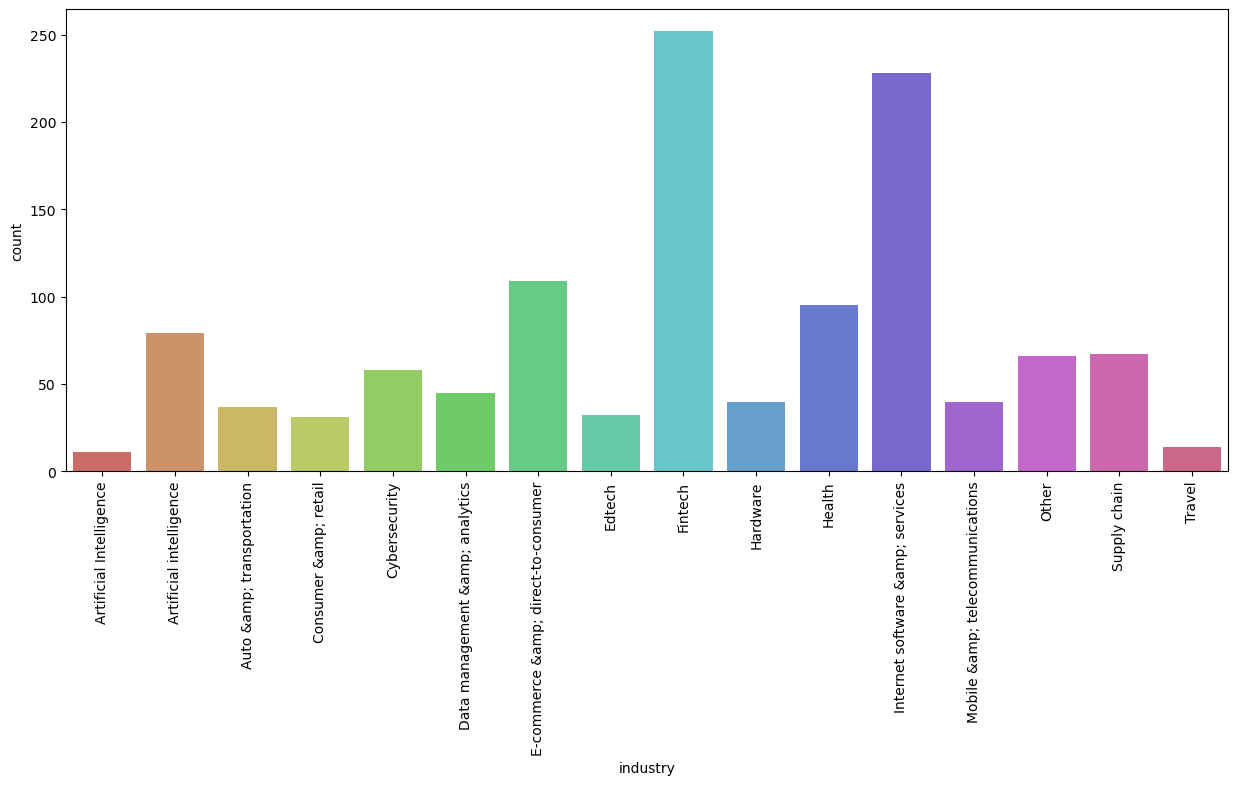

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(x = df['industry'],
             data = df,
             palette = 'hls')
plt.xticks(rotation = 90) 
plt.show()

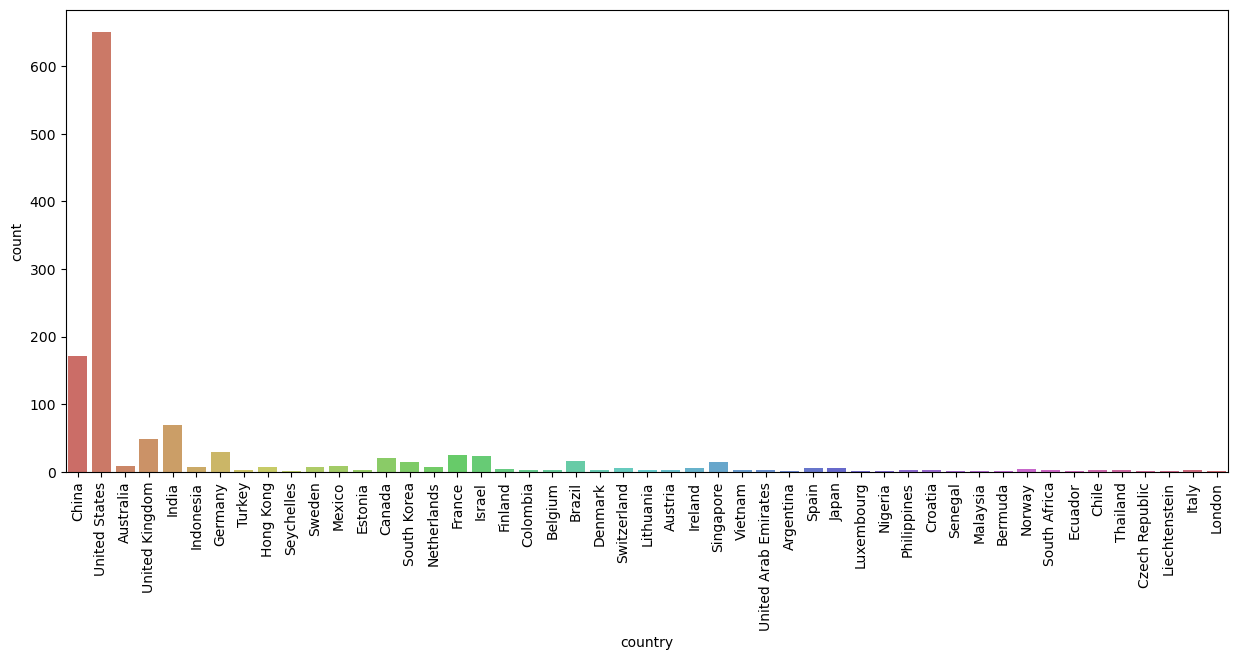

In [26]:
plt.figure(figsize=(15,6))
sns.countplot(x = df['country'], data = df,
             palette = 'hls')
plt.xticks(rotation = 90) 
plt.show()

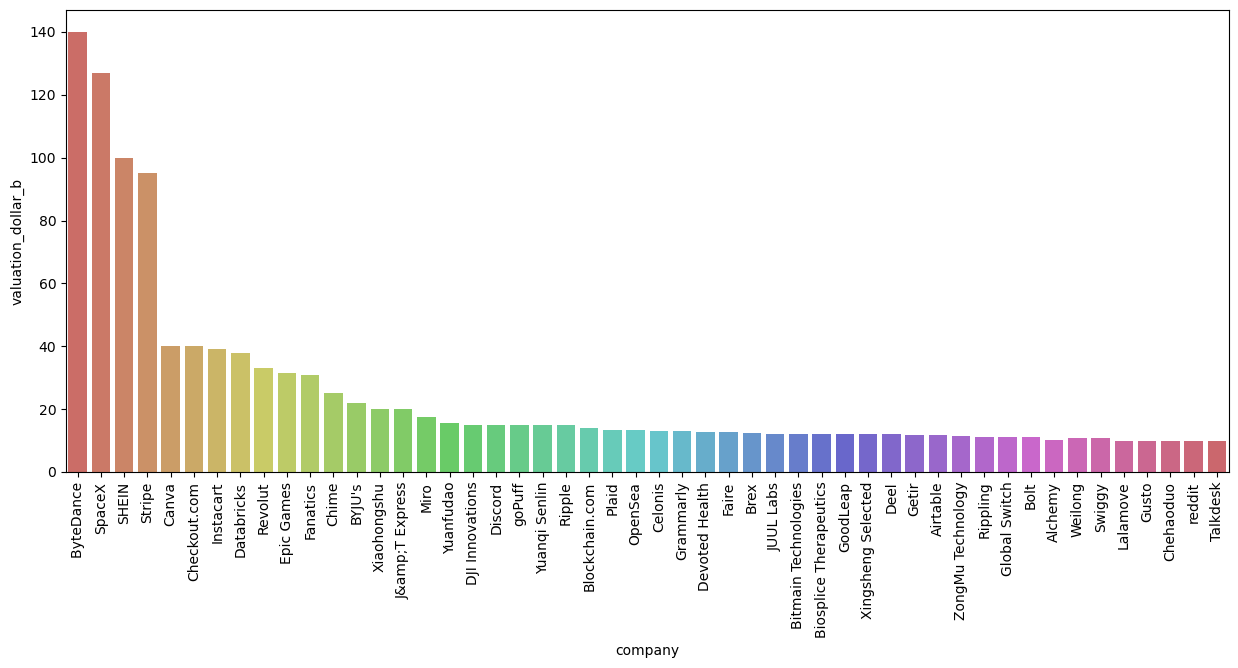

In [27]:
plt.figure(figsize=(15,6))
sns.barplot(x = df['company'].head(50), 
            y = df['valuation_dollar_b'].head(50), 
            data = df, 
            palette = 'hls')
plt.xticks(rotation = 90) 
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

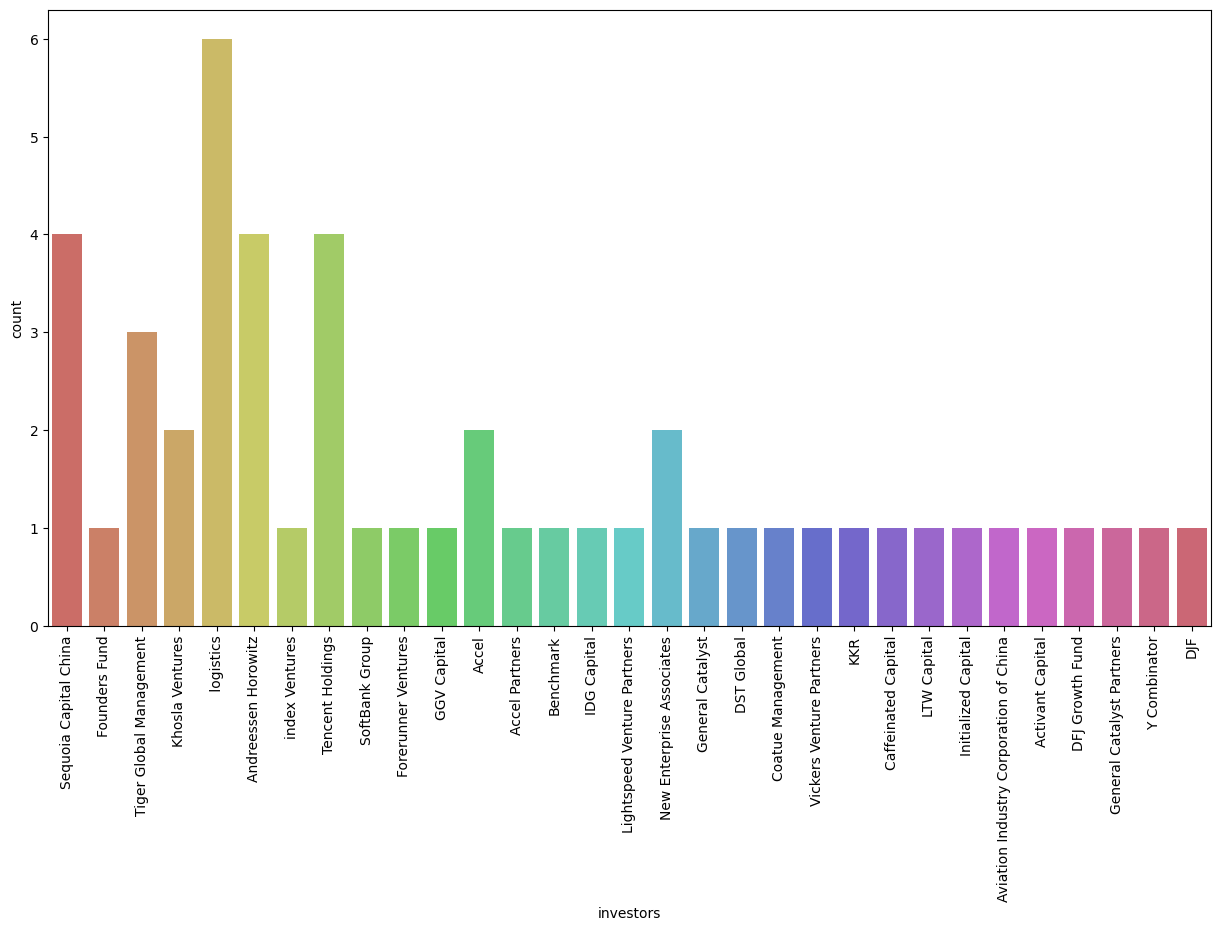

In [32]:
plt.figure(figsize = (15,8))
sns.countplot(x = df['investors'].head(50), 
              data = df, 
              palette = 'hls')
plt.xticks(rotation = 90)
plt.show

In [33]:
df.to_csv('unicorns.csv')